# Previsão de Vendas

### Importando as bibliotecas necessárias

In [1]:
# dar permissão ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# especificando o endereço da pasta raiz
import os
pathRaiz = '/content/drive/MyDrive/Previsao_Vendas'
os.chdir(pathRaiz)
os.getcwd()

'/content/drive/MyDrive/Previsao_Vendas'

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 21, 6

In [4]:
!pip install pycaret-ts-alpha

### Carregando a base de dados

In [5]:
ls -lah dados_vendas/

total 75M
-rw------- 1 root root 1.2M Feb  4 10:31 produtos_tabloide_20191201_20220203.csv
-rw------- 1 root root  11M Feb  4 18:30 vnd_acum_diaria_20191201_20220203.csv
-rw------- 1 root root  23K Feb 20 21:30 vnd_diaria_acum_20191201_20220219.csv
-rw------- 1 root root  52M Feb 11 12:14 vnd_diaria_cupom_20191201_20220211.csv
-rw------- 1 root root  11M Feb 19 13:18 vnd_diaria_produto_acum_20191201_20220219.csv


In [6]:
# transformando os dados em uma Série Temporal
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [7]:
ds = pd.read_csv('dados_vendas/vnd_diaria_acum_20191201_20220219.csv',parse_dates=['DTVND'], index_col='DTVND', date_parser=dateparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [8]:
ds.head()

,QTDVND,VLRVND
DTVND,,
2022-02-19,546.0,11029.19
2022-02-18,1082.0,19862.03
2022-02-17,743.0,13924.28
2022-02-16,810.0,21149.62
2022-02-15,768.0,12885.25


In [9]:
ds.sort_index(ascending=True,inplace=True)

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 2019-12-01 to 2022-02-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   QTDVND  812 non-null    float64
 1   VLRVND  812 non-null    float64
dtypes: float64(2)
memory usage: 19.0 KB


In [11]:
ds.isnull().sum()

QTDVND    0
VLRVND    0
dtype: int64

In [12]:
df = ds.copy()

In [13]:
#df = df[df['CODPROD'] == 101483] # DORFLEX C/10 CPR

In [14]:
#df.drop(['CODPROD','QTDVND'], axis=1, inplace=True)
df.drop(['QTDVND'], axis=1, inplace=True)

In [15]:
idx = pd.date_range('2019-12-01','2022-02-19')
df = df.reindex(idx, fill_value=0,axis=0)
df.head()

,VLRVND
2019-12-01,8129.52
2019-12-02,18437.56
2019-12-03,16975.53
2019-12-04,14604.22
2019-12-05,17827.71


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 2019-12-01 to 2022-02-19
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VLRVND  812 non-null    float64
dtypes: float64(1)
memory usage: 12.7 KB


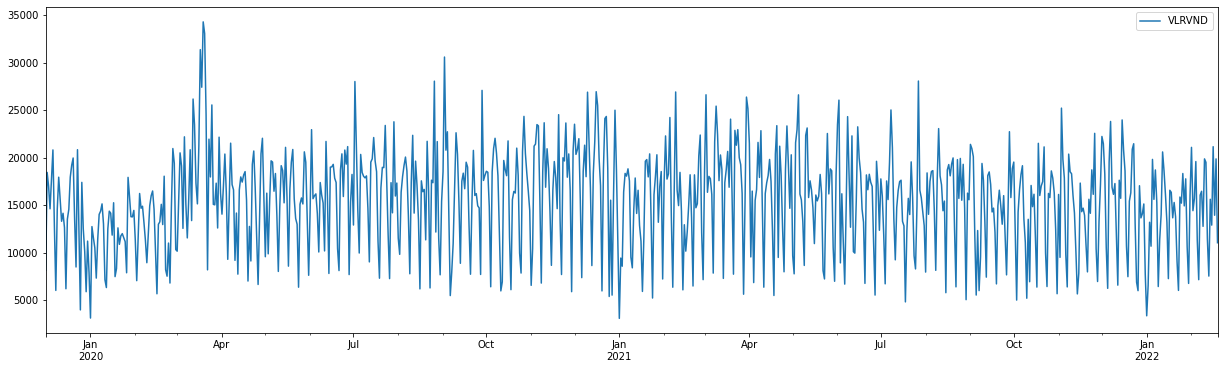

In [17]:
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
#plt.plot(df)
df.plot()
plt.show()

In [18]:
from pycaret.time_series import *

RuntimeError: ignored

RuntimeError: ignored

RuntimeError: ignored

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [19]:
setup(data=df, fh=12)
models()

,Description,Value
0,session_id,944
1,Original Data,"(812, 1)"
2,Missing Values,False
3,Transformed Train Set,"(800,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [20]:
# Without any argument, this will plot the original dataset
plot_model()

In [21]:
# Without an estimator argument, this will plot the original dataset
plot_model(plot="ts")

In [22]:
# ACF and PACF for the original dataset
plot_model(plot="acf")

# NOTE: you can customize the plots with kwargs - e.g. number of lags, figure size (width, height), etc
# data_kwargs such as `nlags` are passed to the underlying functon that gets the ACF values
# figure kwargs such as `fig_size` & `fig_template` are passed to plotly and can have any value that plotly accepts
plot_model(plot="pacf", data_kwargs={'nlags':36, }, fig_kwargs={'fig_size': [800, 500], 'fig_template': 'simple_white'})

In [23]:
plot_model(plot="decomp_classical")
plot_model(plot="decomp_classical", data_kwargs={'type': 'multiplicative'})
plot_model(plot="decomp_stl")

In [24]:
# Show the train-test splits on the dataset
# Internally split - len(fh) as test set, remaining used as test set
plot_model(plot="train_test_split")

# Show the Cross Validation splits inside the train set
plot_model(plot="cv")

In [25]:
# Plot diagnostics
plot_model(plot="diagnostics")

In [26]:
# Plot differences along with diagnostics such as ACF and PACF

# Row 1: Original
# Row 2: d = 1
# Row 3: d = 2
plot_model(plot="diff", data_kwargs={"order_list": [1, 2], "pacf": True})

# Row 1: Original
# Row 2: d = 1
# Row 3: First (d = 1) then (D = 1, s = 12)
#   - Corresponds to applying a standard first difference to handle trend, and
#     followed by a seasonal difference (at lag 12) to attempt to account for
#     seasonal dependence.
# Ref: https://www.sktime.org/en/v0.8.0/api_reference/modules/auto_generated/sktime.transformations.series.difference.Differencer.html
plot_model(plot="diff", data_kwargs={"lags_list": [[1], [1, 12]], "acf": True, "pacf": True})

In [27]:
check_stats(alpha = 0.2)

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,812.0
1,Summary,Statistics,Mean,,15458.274532
2,Summary,Statistics,Median,,15997.67
3,Summary,Statistics,Standard Deviation,,5201.06873
4,Summary,Statistics,Variance,,27051115.930682
5,Summary,Statistics,Kurtosis,,-0.124753
6,Summary,Statistics,Skewness,,-0.059886
7,Summary,Statistics,# Distinct Values,,812.0
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.2, 'K': 24}",1356.617325
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.2, 'K': 48}",2647.640484


In [28]:
# Options are: 'all', 'summary', 'white_noise' 'stationarity', 'adf', 'kpss', 'normality'
check_stats(test="summary")

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,8.120000e+02
1,Summary,Statistics,Mean,,1.545827e+04
2,Summary,Statistics,Median,,1.599767e+04
3,Summary,Statistics,Standard Deviation,,5.201069e+03
4,Summary,Statistics,Variance,,2.705112e+07
5,Summary,Statistics,Kurtosis,,-1.247529e-01
6,Summary,Statistics,Skewness,,-5.988643e-02
7,Summary,Statistics,# Distinct Values,,8.120000e+02


In [29]:
# Options are: 'all', 'summary', 'white_noise' 'stationarity', 'adf', 'kpss', 'normality'
check_stats(test="summary")

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,8.120000e+02
1,Summary,Statistics,Mean,,1.545827e+04
2,Summary,Statistics,Median,,1.599767e+04
3,Summary,Statistics,Standard Deviation,,5.201069e+03
4,Summary,Statistics,Variance,,2.705112e+07
5,Summary,Statistics,Kurtosis,,-1.247529e-01
6,Summary,Statistics,Skewness,,-5.988643e-02
7,Summary,Statistics,# Distinct Values,,8.120000e+02


In [30]:
# For white noise, Setting it denotes the lags used to test
check_stats(test='white_noise')

,Test,Test Name,Property,Setting,Value
0,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",1356.617325
1,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",2647.640484
2,White Noise,Ljung-Box,p-value,"{'alpha': 0.05, 'K': 24}",0.0
3,White Noise,Ljung-Box,p-value,"{'alpha': 0.05, 'K': 48}",0.0
4,White Noise,Ljung-Box,White Noise,"{'alpha': 0.05, 'K': 24}",False
5,White Noise,Ljung-Box,White Noise,"{'alpha': 0.05, 'K': 48}",False


In [31]:
# You can change alpha if needed (would not recommend though)
check_stats(test='stationarity', alpha = 0.2)

,Test,Test Name,Property,Setting,Value
0,Stationarity,ADF,Stationarity,{'alpha': 0.2},True
1,Stationarity,ADF,p-value,{'alpha': 0.2},0.002135
2,Stationarity,ADF,Test Statistic,{'alpha': 0.2},-3.886688
3,Stationarity,ADF,Critical Value 1%,{'alpha': 0.2},-3.438655
4,Stationarity,ADF,Critical Value 5%,{'alpha': 0.2},-2.865205
5,Stationarity,ADF,Critical Value 10%,{'alpha': 0.2},-2.568722
6,Stationarity,KPSS,Trend Stationarity,{'alpha': 0.2},False
7,Stationarity,KPSS,p-value,{'alpha': 0.2},0.01
8,Stationarity,KPSS,Test Statistic,{'alpha': 0.2},0.358119
9,Stationarity,KPSS,Critical Value 10%,{'alpha': 0.2},0.119


In [32]:
fh=int(df.shape[0]*0.20)

setup(df, fh=fh, fold=3, seasonal_period='D', session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(812, 1)"
2,Missing Values,False
3,Transformed Train Set,"(650,)"
4,Transformed Test Set,"(162,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [33]:
#Definindo os dados de treino e validação
y_treino = get_config("y_train")
y_teste = get_config("y_test")

In [34]:
best_model = compare_models(n_select=3, turbo=False)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
tbats,TBATS,2620.3824,3548.7004,0.1908,0.1694,0.7647,0.7388,0.5327,47.6100
bats,BATS,3078.7411,3990.9675,0.2202,0.1958,0.9019,0.8351,0.4055,21.2167
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,3029.7119,3898.9226,0.2413,0.1989,0.8813,0.8096,0.429,11.2933
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,3051.7543,3920.2496,0.2461,0.2008,0.8892,0.8156,0.4207,11.1967
theta,Theta Forecaster,3150.8233,4045.6349,0.2372,0.2008,0.9233,0.8468,0.3816,0.0267
snaive,Seasonal Naive Forecaster,3347.3977,4437.5586,0.2364,0.2052,0.9834,0.933,0.235,0.0267
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,3133.973,4024.52,0.2541,0.2071,0.9151,0.8389,0.3949,0.1167
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,3201.3346,4070.4147,0.2582,0.2091,0.9341,0.8479,0.3761,11.0433
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,3156.4063,4031.5584,0.2655,0.2091,0.9194,0.8381,0.391,0.1300
arima,ARIMA,3474.393,4571.3081,0.2461,0.2107,1.0217,0.9623,0.1756,0.0700


In [35]:
best_model

[TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
       n_jobs=None, show_warnings=False, sp=7, use_arma_errors=True,
       use_box_cox=True, use_damped_trend=None, use_trend=None),
 BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=7, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None),
 BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                     regressor=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                

In [37]:
best_model_1 = create_model('tbats')
# Gerando as previsões do modelo 1
y_predito_1 = predict_model(best_model_1)
# Plot Out-of-Sample Forecasts
plot_model(estimator = best_model_1)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-12,2350.0591,3312.8660,0.1605,0.1518,0.6426,0.6346,0.5410
1,2020-10-21,2981.4919,3988.0626,0.2156,0.1870,0.8871,0.8485,0.4966
2,2021-04-01,2529.5962,3345.1725,0.1963,0.1693,0.7644,0.7333,0.5604
Mean,NaT,2620.3824,3548.7004,0.1908,0.1694,0.7647,0.7388,0.5327
SD,NaT,265.6545,310.9558,0.0228,0.0144,0.0998,0.0874,0.0267


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,TBATS,2246.0118,3012.4802,0.1876,0.1591,0.6878,0.6685,0.5962


In [38]:
best_model_2 = create_model('bats')
# Gerando as previsões do modelo 2
y_predito_2 = predict_model(best_model_2)
# Plot Out-of-Sample Forecasts
plot_model(estimator = best_model_2)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-12,2399.7758,3268.7736,0.1632,0.1547,0.6562,0.6261,0.5531
1,2020-10-21,3522.0307,4474.0250,0.2275,0.2171,1.0479,0.9519,0.3664
2,2021-04-01,3314.4168,4230.1040,0.2699,0.2156,1.0015,0.9273,0.2971
Mean,NaT,3078.7411,3990.9675,0.2202,0.1958,0.9019,0.8351,0.4055
SD,NaT,487.5252,520.2867,0.0438,0.0291,0.1748,0.1481,0.1081


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,BATS,2321.8954,3231.6639,0.1697,0.1617,0.7111,0.7171,0.5353


In [39]:
best_model_3 = create_model('rf_cds_dt')
# Gerando as previsões do modelo 3
y_predito_3 = predict_model(best_model_3)
# Plot Out-of-Sample Forecasts
plot_model(estimator = best_model_3)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-12,3080.8686,3970.0393,0.2505,0.2026,0.8424,0.7604,0.3408
1,2020-10-21,3016.2078,3955.9002,0.2266,0.1923,0.8974,0.8416,0.5047
2,2021-04-01,2992.0593,3770.8283,0.2468,0.2018,0.9041,0.8266,0.4414
Mean,NaT,3029.7119,3898.9226,0.2413,0.1989,0.8813,0.8096,0.4290
SD,NaT,37.4926,90.7601,0.0105,0.0047,0.0276,0.0353,0.0675


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,RandomForestRegressor,2327.3117,3138.3317,0.1775,0.1704,0.7127,0.6964,0.5617


In [40]:
#Tunning dos modelos
model_tunning_1 = tune_model(best_model_1)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-12,2369.2815,3322.8761,0.1638,0.1541,0.6478,0.6365,0.5382
1,2020-10-21,2981.4919,3988.0626,0.2156,0.1870,0.8871,0.8485,0.4966
2,2021-04-01,2529.5962,3345.1725,0.1963,0.1693,0.7644,0.7333,0.5604
Mean,NaT,2626.7899,3552.0371,0.1919,0.1701,0.7664,0.7394,0.5317
SD,NaT,259.2108,308.4510,0.0213,0.0135,0.0977,0.0867,0.0265


In [41]:
model_tunning_2 = tune_model(best_model_2)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-12,2439.4449,3315.6010,0.1624,0.1564,0.6670,0.6351,0.5402
1,2020-10-21,3240.0071,4226.3915,0.2212,0.2011,0.9640,0.8992,0.4346
2,2021-04-01,3161.8296,3973.1781,0.2565,0.2082,0.9554,0.8710,0.3799
Mean,NaT,2947.0939,3838.3902,0.2134,0.1886,0.8621,0.8017,0.4516
SD,NaT,360.3781,383.8495,0.0388,0.0229,0.1380,0.1184,0.0665


In [42]:
model_tunning_3 = tune_model(best_model_3)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-12,3334.7387,4143.0745,0.2555,0.2098,0.9118,0.7936,0.2821
1,2020-10-21,2908.9504,3864.3409,0.2403,0.1875,0.8655,0.8222,0.5273
2,2021-04-01,2919.1527,3766.6139,0.2333,0.1925,0.8821,0.8257,0.4427
Mean,NaT,3054.2806,3924.6764,0.2430,0.1966,0.8865,0.8138,0.4174
SD,NaT,198.3575,159.5011,0.0093,0.0095,0.0192,0.0144,0.1017


In [43]:
print(best_model_2)
print(model_tunning_2)

BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=7, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=None, use_trend=None)
BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=7, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=True, use_trend=True)


In [44]:
#Previsões com os modelos tunados
y_predito_tunning_1 = predict_model(model_tunning_2)
plot_model(estimator=model_tunning_2)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,BATS,2213.5189,3073.9455,0.1698,0.1539,0.6779,0.6821,0.5795


In [45]:
#Finalizando o modelo
model_final = finalize_model(model_tunning_2)
plot_model(model_tunning_2)
predict_model(model_tunning_2)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,BATS,2213.5189,3073.9455,0.1698,0.1539,0.6779,0.6821,0.5795


2021-09-11    11221.5452
2021-09-12     6123.9783
2021-09-13    14305.7710
2021-09-14    16404.0930
2021-09-15    15558.8082
                 ...    
2022-02-15    17224.3393
2022-02-16    16289.0289
2022-02-17    15326.9363
2022-02-18    15329.0502
2022-02-19    11956.1801
Freq: D, Name: VLRVND, Length: 162, dtype: float64

In [46]:
model_final

BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=7, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=True, use_trend=True)

In [47]:
plot_model(model_final, plot='forecast')

In [48]:
# previsão próximos 12 dias
plot_model(model_final, plot='forecast', data_kwargs={'fh':12})